# Recognizing Traffic Signs using CNN Keras

The goal of this project is to build a predictive model capable of correctly detecting the type of traffic sign. 

__Why recognizing traffic sign is important?__

Traffic signs come in pictures mostly, with different colors and shape. The help communicate messages to drivers and pedestrians for overall safety.

Deep learning computer vision plays an important role in driver-assistance systems and driverless operations to detect other cars and objects, to avoid collision. 
	
Correctly detecting and recognizing traffic signs is challenging and equally important for these cars to navigate safely, avoid collisions, avoid breaking traffic laws and ultimately contribute towards the success of the cause.


# 1. Introduction to the CNN Architechture

Computer vision is advancing rapidly with deep learning. Convolution Neural Network (CNN), a subset of deep learning, is a powerful neural network model that can be used for image and video processing. The model has an input layer, the hidden layer and an output layer. The hidden layer has the convolutional or conv layers, pooling layers that flattens out to connect to a fully connected NN layers into the output layer.

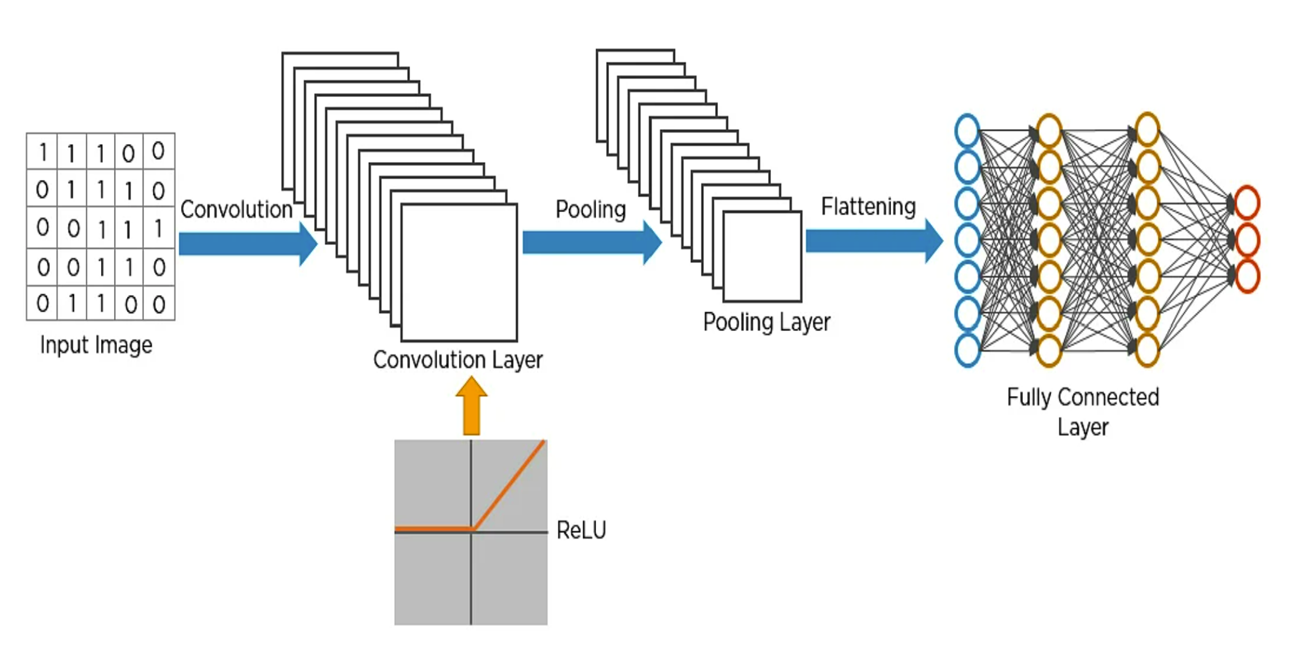

# 2. The Data:

The data is obtained from Kaggle and consists of images of traffic signs.  The data has been already spit into train, validation and test set inform of archived pickle files. The size of the individual set are:

Train set: 34799 data points
Validation set: 4410 data points
Test set: 12630 data points

The features are images in form of numpy arrays of uint-8 (8-bit unsigned integers) data type. Image are colored of size 32x32x3.

There are 43 label classes of traffic signs. Labels are in form of intergers ranging from 0 to 42. The file signnames.csv provides the names of all the traffic sign labels.

The images were taken under various light conditions and due to smaller image size of 32x32x3, most of them lacked clarity. Some images are very blurry. We will prview a few of the images from the training set during our exploratory data analysis.

## 2.1. Import common libraries

In [48]:
# import common libraries
import numpy as np
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Tensorflow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
# Import Tensorflow Libraries
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard

from sklearn.metrics import confusion_matrix
import itertools

# Image processing
import PIL
from PIL import Image
import cv2 as cv
print(cv.__version__)

# Plotting libraries
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

from time import time
import os

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', style='darkgrid')

4.6.0


## 2.2 Load Data and Explore Random Images

In [2]:
dataroot = "dataroot/"
#!mkdir dataroot ## This is a one time initial run code to create directory

In [2]:
## This is a one time initial run code
# import requests

# base_url = r'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/'
# base_output = r'C:/@Python/notebookhw/dataroot/'
# files = ['data_1.zip', 'data_2.zip','data_3.zip']

# for file in files:
#     r = requests.get(base_url+file)
#     print(base_url+file)
#     with open(base_output+file,'wb')as f:
#         print(base_output+file)
#         f.write(r.content)

In [3]:
## This is a one time initial run code
# Unzip and extract files from folders
# import zipfile

# with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
#     zip_ref.extractall(dataroot)
# with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
#     zip_ref.extractall(dataroot)
# with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
#     zip_ref.extractall(dataroot)

In [118]:
# Load and check the sign names with the signname.csv file
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

ClassId
0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                      

In [4]:
# Load train set sign images from pickle file
import pickle
train_set = pickle.load( open( dataroot+"train.p", "rb" ) )

In [5]:
# Checking keys of train set
train_set.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [6]:
# Checking a random train_set label and matching it's name
print(train_set['labels'][20123])
print(signnames[train_set['labels'][20123]])

34
Turn left ahead


In [119]:
sign_names = df.copy()
sign_names.set_index("ClassId")
print(sign_names.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


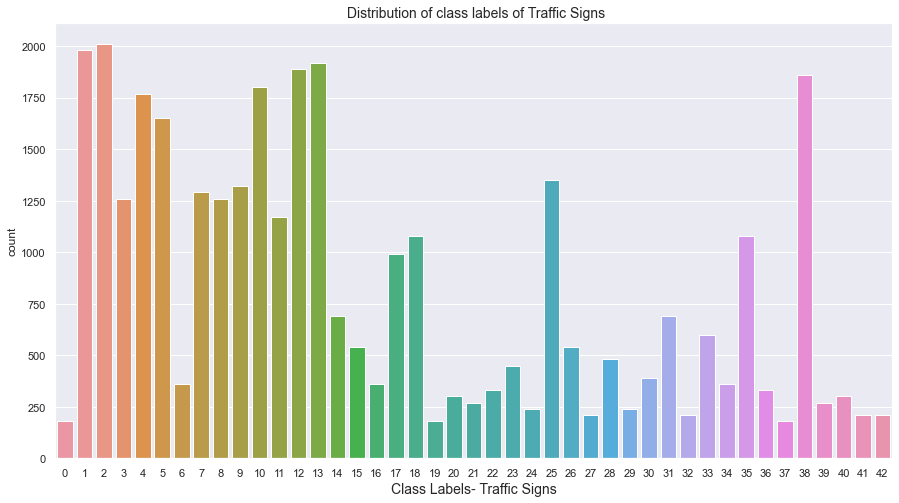

In [131]:
# Countplot of training set labels
plt.figure(figsize=(15,8))
sns.countplot(train_set['labels'])
plt.xlabel("Class Labels- Traffic Signs", fontsize=14)
plt.title(" Distribution of class labels of Traffic Signs", fontsize=14)
plt.show()

The distribution of class labels are highly imbalanced as shown in the histogram above. The count of only few of the classes go beyond 1500.

### Preview some of the images at random

The image shows a Turn left ahead sign


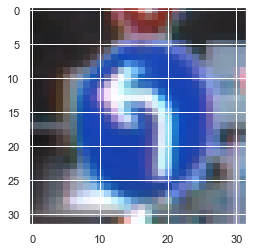

In [7]:
# Preview an image class
idx = 20123
plt.imshow(train_set['features'][idx])
print("The image shows a {} sign".format(signnames[train_set['labels'][idx]]))

The image shows a Speed limit (80km/h)sign


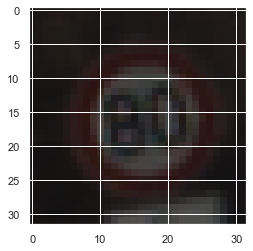

In [8]:
# Preview one more image class
index = 13245
plt.imshow(train_set['features'][index])
print("The image shows a {}sign".format(signnames[train_set['labels'][index]]))

The image shows a End of all speed and passing limits sign


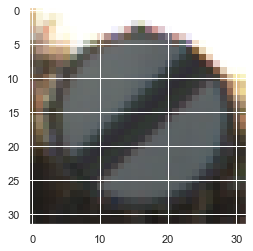

In [9]:
# Preview more image
idx = 10345
plt.imshow(train_set['features'][idx])
print("The image shows a {} sign".format(signnames[train_set['labels'][idx]]))

The image shows a Wild animals crossing sign


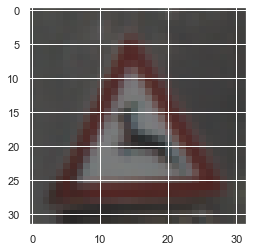

In [10]:
# Preview more image
idx = 565
plt.imshow(train_set['features'][idx])
print("The image shows a {} sign".format(signnames[train_set['labels'][idx]]))

An image size of 32*32*3 here renders to low image quality. Most images have low clarity and looks blurry. However, another major thing that we see here is that the images were taken under different light conditions. Usually, a normalizing is used to eliminate the effect of the illumination. We will try that when preparing the data.

In [11]:
# Number of total classes of traffic signal images
num_classes = 43
# Dimension of each image
i_ht = 32
i_wdth = 32
i_channels = 3 # (RGB)

## 2.2 Data Preparation

### 1. Splitting train, validation and test into X and y

In [12]:
# Split train set into X and y
X_train = train_set['features']
y_train = train_set['labels']
# Check dimensions of training set, X and y-labels and image size
print(X_train.shape, y_train.shape)

(34799, 32, 32, 3) (34799,)


In [13]:
# Load validation set and split into X and y
valid_set = pickle.load(open(dataroot+"valid.p", "rb"))
print(valid_set.keys(),'\n')
X_valid = valid_set['features']
y_valid = valid_set['labels']
print(X_valid.shape, y_valid.shape)

dict_keys(['coords', 'labels', 'features', 'sizes']) 

(4410, 32, 32, 3) (4410,)


In [14]:
# Load test set and split into X and y
test_set = pickle.load(open(dataroot+"test.p", "rb"))
print(test_set.keys(),'\n')
X_test = test_set['features']
y_test = test_set['labels']
print(X_test.shape, y_test.shape)

dict_keys(['sizes', 'coords', 'features', 'labels']) 

(12630, 32, 32, 3) (12630,)


### 2. Normalization of Features to eliminate the effect of the illumination

In [16]:
# Normalize the feature data to eliminate the effect of the illumination
X_trainN = X_train / 255.0
X_validN = X_valid / 255.0
X_testN = X_test / 255.0

### 3. Reshape the features

In [17]:
# Reshape image in 3 dimensions
X_trainN = X_trainN.reshape(-1,32,32,3)
X_testN = X_testN.reshape(-1,32,32,3)
X_validN = X_validN.reshape(-1,32,32,3)

### 4. Label Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

# Convert to labels to one-hot-encoding
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape, y_valid.shape, y_test.shape)

(34799, 43) (4410, 43) (12630, 43)


### 5. Preview Images after Normalization

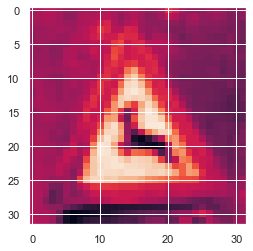

In [19]:
# Checking some image after normalization
g = plt.imshow(X_trainN[565][:,:,0]) #The image shows a Wild animals crossing sign

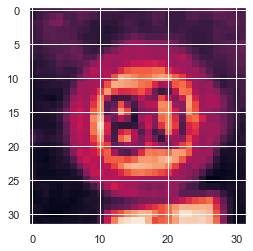

In [20]:
# Checking some image after normalization
g = plt.imshow(X_trainN[13245][:,:,0])# The image shows a Speed limit (80km/h)sign

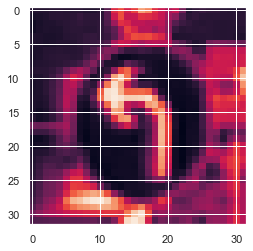

In [21]:
# Checking some image after normalization
g = plt.imshow(X_trainN[20123][:,:,0])# The image shows a Speed limit (80km/h) sign

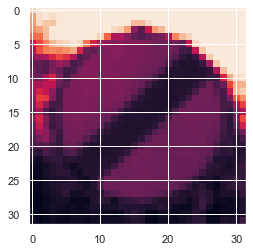

In [22]:
# Checking some image after normalization
g = plt.imshow(X_trainN[10345][:,:,0])# The image shows a Speed limit (80km/h)sign

Above are how the images look after normalization. As seen earlier, some images taken under low light condition improved with normalization. The Speed limit (80km/h) sign image earlier seen, that was taken under better light condition shows similar illumination as the others.

### 6. Data Augmentation 

Using Data Augmentation, we can quickly increase the amount of data for our imbalanced classes, this will ensure that our model does not see the same image twice and helps avoid overfitting and helps the model to generalize better.

There are various options available with data augmentation, such as image height or width shift, image rotation, horizontal or vertical flip. In my case I have selected:
- random image rotation of 10 degrees
- randomly zoom image 0.1
- randomly shift images horizontally to 0.1
- randomly shift images vertically to 0.1

In [25]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_trainN)

# 3. CNN Model

### Why use Convolutions?

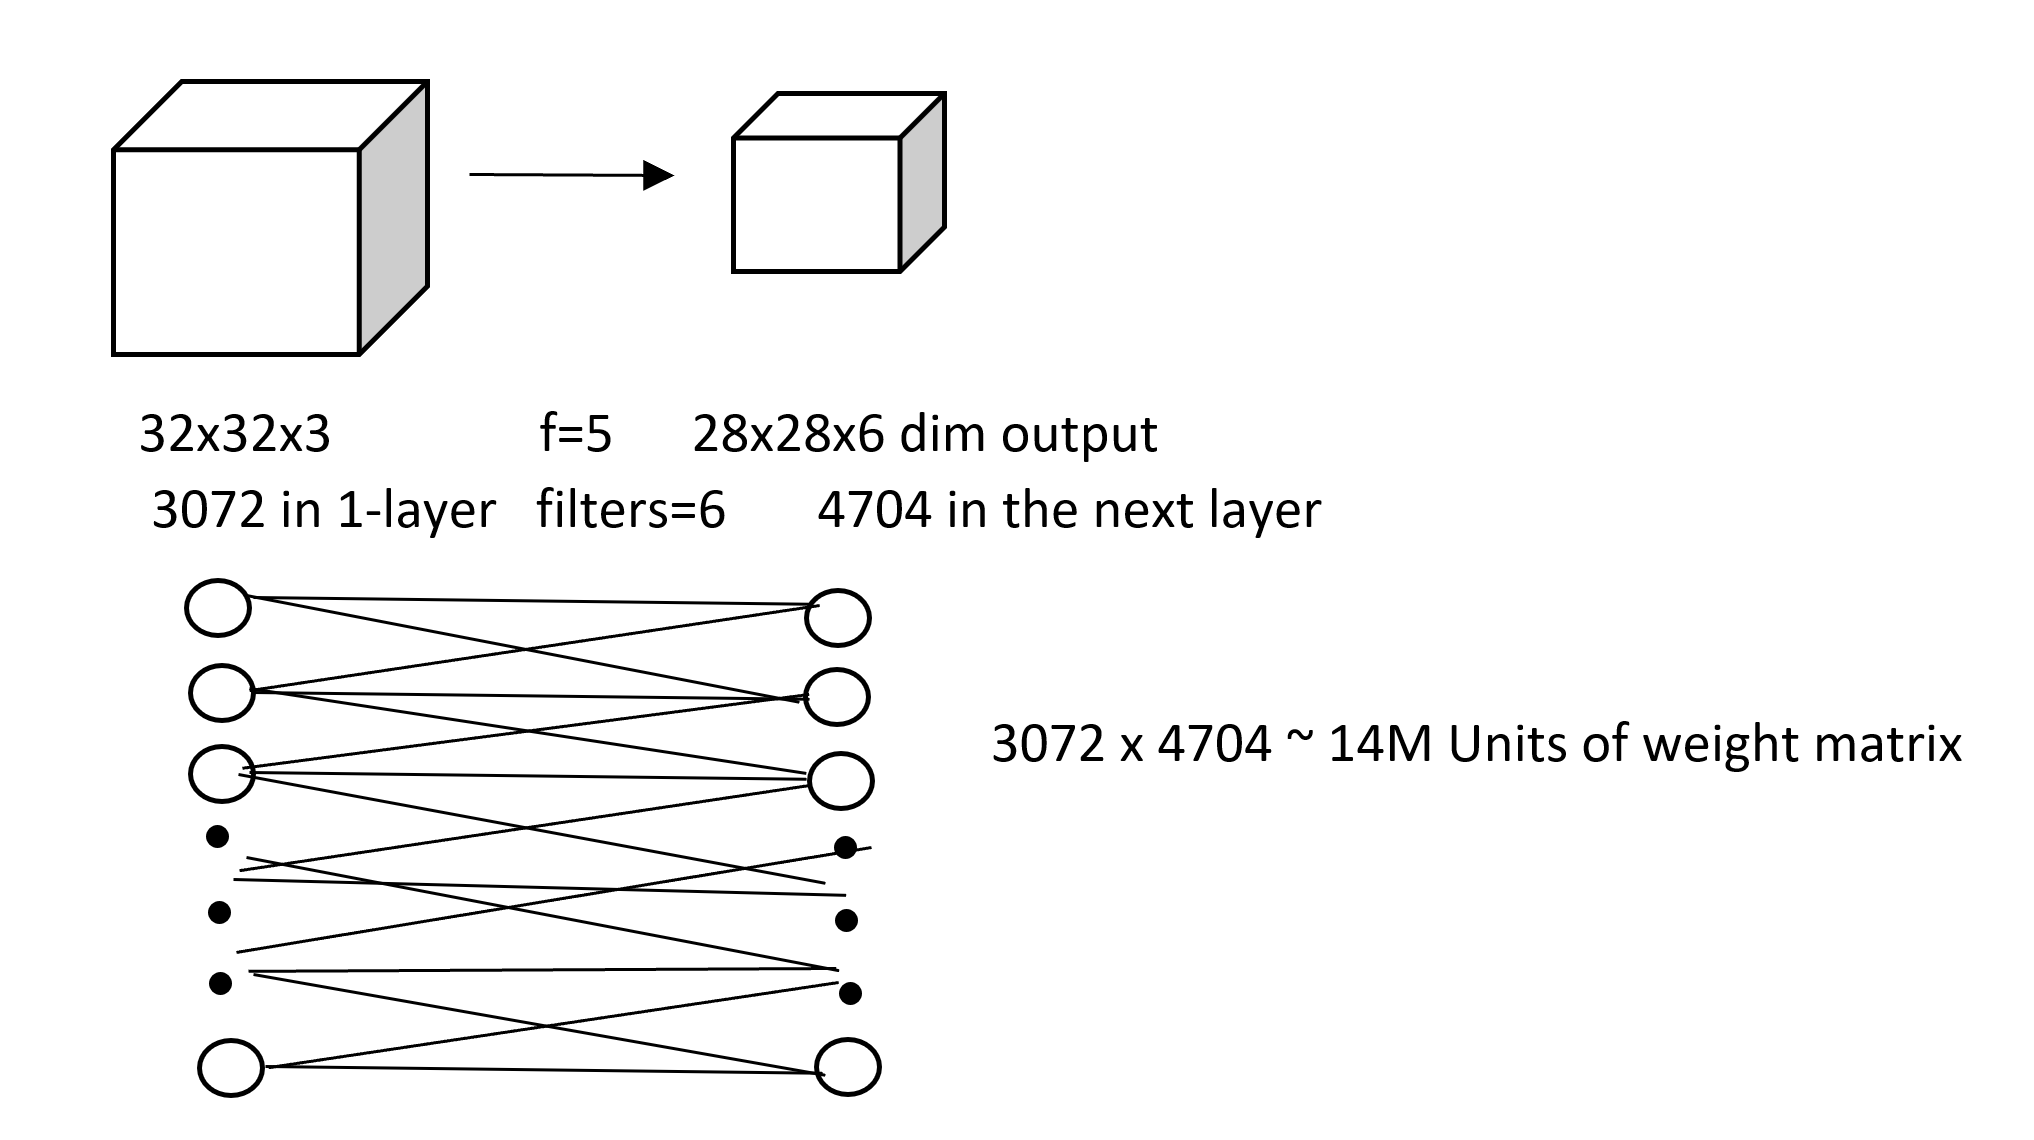

Say, we have our input image of size 32x32x3 with filter size of 5, number of filters 6 to give a 28x28x6 dimensional output. If we were to create a neural network model using the 3072 (32*32*3) neuron units in the first layer and 4704 (28*28*6) units in the next layer, with every neurons connected to each other, the total number of parameters in the weight matrix will be approx. 14M. This will add a huge computional load and considering that our image size is really small this is a lot of parameters to train. And if the image size is large, this would not be feasible. The convenience of using convolutional network is:

1.	Parameter Sharing: If we think about a conv net here instead, we will have 5 x 5 = 25 + 1 (bias) = 26 x 6 (filters) = 156 parameters. In conv net we do parameter sharing. Ex. Ex. Say, a vertical feature that’s useful in one part of the image can use the same parameters in lots of different positions in the same image. Hence the number of parameters are reduced.

2.	Sparsity Connections: In each layer, each output value depends only on a small number of inputs. 

In [23]:
# Clearing previous session if there was any
keras.backend.clear_session() # Clearing previous session if there was any
# Setting seed to ensure reproducibility
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)

## 3.1 Set Callbacks

### Learning Rate Sceduling

Finding a good learning rate can be tricky and constant learning rates can have downsides. Starting with high learning rates and reduce it can make the optimizer converge faster. This is called __Learning Rate Scheduling__

We will use keras callback function __ReduceLROnPlateau__ for our __Performance Scheduling__ where we start the learning rate higher and decrease the LR by half if preferred accuracy is not reached by certain epochs.

### Visualizations using Tensorboard

Tensorboard is an interactive visualization tool that can be used to view the learning curves during training like training accuracy, training loss, validation accuracy and validation loss. Apart from that it can:
- compare learning curves between multiple runs
- visualize the computation graph
- analyze training statistics
- view images generated by your model
- visualize complex multidimensional data projected down to 3D and automatically clustered

In [50]:
# Set a learning rate scheduling
learning_rate_reduction = ReduceLROnPlateau(factor=0.5,patience=3, min_lr=0.00001) 

# Create a log directory to store tensorboard logs
logs_base_dir = 'logs_tf/'
tensorboard = TensorBoard(log_dir=logs_base_dir)

## 3.2 Define our CNN Model

Here I'm using Tensorflow background and Keras Sequential API, where we add one layers at a time, starting from the input layer.

The first layer is the input convolutional layer (Conv2D) where we provide the input shape of our image which is 32*32*3. I have set 32 filters for the first two Conv2D layers and 64 filters for the last two. Each filter detects a distinct feature of the image and the kernel filter matrix is applied on the whole image image to create a feature map.

The other parameters used for Conv2D are padding and activation function. Padding="same" means we add a border of zero around our input image size so that the input dimensions = output dimensions. The activation function="relu" is used to add non-linearity to the network.

The next important layer in our CNN model is the pooling layer. MaxPooling has been used here. This goal of this layer is to subsample or shrink the input image. Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped. This reduces the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting). Max pooling preserves only the strongest feature, getting rid of all the meaningless ones. 

Batch normalization layer was used after every convolutional and Pooling layers.Batch normalization acts as regularization and normalise the output of the previous layer.

Dropout is a technique used to prevent a model from overfitting.

__Note__: __Batch Normalization__ and __Dropout__ layer was added later to tune our CNN model which definitely improved the scores.

The Flatten layer is use to convert the final 2D feature maps into a one single 1D vectorwhich is then fed to as input to the fully connected layers (Dense Layers) to classify the image.I have used two fully-connected (Dense) layers. The last Dense layer has units=43 or number of classes that outputs the distribution of probability of each class. Since we have more that 2 classes we have used the Softmax activation function for the last layer.

Next we will start training our model using different optimizers and a simple epochs=4, calculate the time and accuracy and evaluate the accuracy and loss curves for each optimizer.

In [27]:
# 1. Create our layered convolutional network 
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])
# Set epochs
epochs=4 # Number of times the algorithm runs on the whole training dataset.
batch_size=128 # Number of samples to be taken to for updating the model parameters

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

## 3.3 Train and Evaluate Model

### Epochs=4

### Optimizer 1: Adam

In [29]:
## 1. Compile using Optimizer: Adam

#Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compilation of our model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Time to complete the epochs
tic = time()
# fit our model
# history = model.fit(X_trainN, y_train, epochs=epochs, validation_data=(X_validN, y_valid))
history = model.fit_generator(datagen.flow(X_trainN, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_validN, y_valid),
                             verbose=1, steps_per_epoch=X_trainN.shape[0] // batch_size)
toc = time()
elasped = toc - tic
print("Elasped time is %f seconds" % elasped)

Epoch 1/4
271/271 [==============================] - 58s 211ms/step - loss: 2.2904 - accuracy: 0.3684 - val_loss: 2.9234 - val_accuracy: 0.2213
Epoch 2/4
271/271 [==============================] - 74s 273ms/step - loss: 0.9388 - accuracy: 0.7067 - val_loss: 0.7881 - val_accuracy: 0.7558
Epoch 3/4
271/271 [==============================] - 76s 281ms/step - loss: 0.4328 - accuracy: 0.8607 - val_loss: 0.2360 - val_accuracy: 0.9381
Epoch 4/4
271/271 [==============================] - 88s 324ms/step - loss: 0.2561 - accuracy: 0.9206 - val_loss: 0.1511 - val_accuracy: 0.9546
Elasped time is 296.399211 seconds


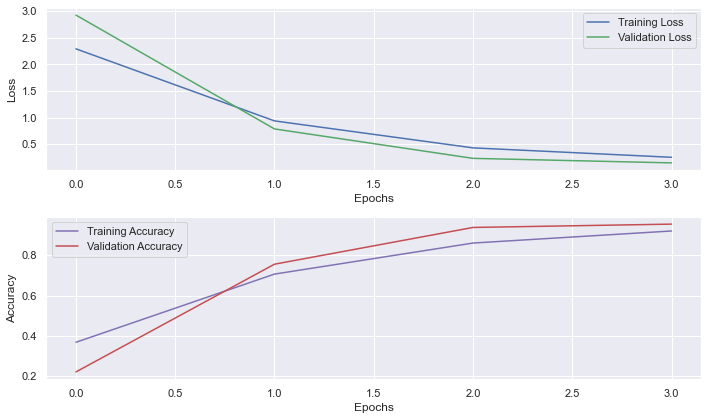

In [33]:
# Plotting Loss and Accuracy Graphs for optimizer: Adam
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(history.history['loss'], label='Training Loss', c='b')
ax[0].plot(history.history['val_loss'], label='Validation Loss',c='g', axes=ax[0])
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], label='Training Accuracy', c='m')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy',c='r', axes=ax[1])
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

### Optimizer 2: SGD

In [34]:
## 2. Compile using Optimizer: SGD 

# Define Optimizer
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
# Compilation of our model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
# Timing the epochs
tic = time()
# Fitting our model

# history = model.fit(X_trainN, y_train, epochs=epochs, validation_data=(X_validN, y_valid))
history = model.fit_generator(datagen.flow(X_trainN, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_validN, y_valid),
                             verbose=1, steps_per_epoch=X_trainN.shape[0] // batch_size)
toc = time()
elasped = toc - tic
print("Elasped time is %f seconds" % elasped)

Epoch 1/4
271/271 [==============================] - 57s 206ms/step - loss: 0.1585 - accuracy: 0.9502 - val_loss: 0.1124 - val_accuracy: 0.9721
Epoch 2/4
271/271 [==============================] - 72s 266ms/step - loss: 0.1408 - accuracy: 0.9579 - val_loss: 0.1153 - val_accuracy: 0.9755
Epoch 3/4
271/271 [==============================] - 84s 309ms/step - loss: 0.1282 - accuracy: 0.9607 - val_loss: 0.1097 - val_accuracy: 0.9746
Epoch 4/4
271/271 [==============================] - 98s 361ms/step - loss: 0.1238 - accuracy: 0.9615 - val_loss: 0.2033 - val_accuracy: 0.9526
Elasped time is 310.495982 seconds


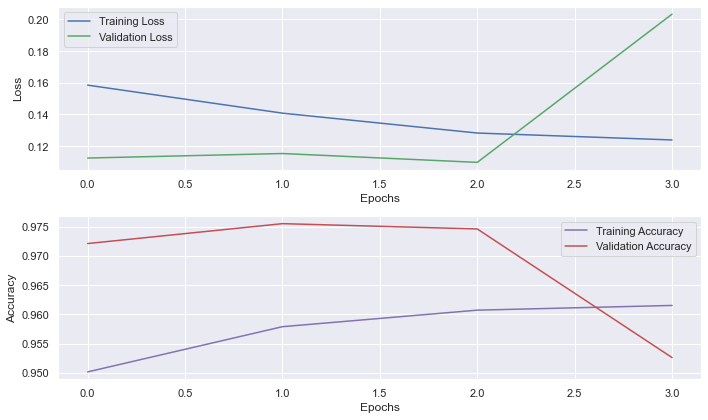

In [35]:
# Plotting Loss and Accuracy Graphs for optimizer: SGD
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(history.history['loss'], label='Training Loss', c='b')
ax[0].plot(history.history['val_loss'], label='Validation Loss',c='g', axes=ax[0])
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], label='Training Accuracy', c='m')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy',c='r', axes=ax[1])
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

### Optimizer 3: RMSprop

In [36]:
## 3. Compile using Optimizer: RMSprop

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9)
# Compile Model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Timing the epochs
tic = time()
# Fitting our model
# history = model.fit(X_trainN, y_train, epochs=epochs, validation_data=(X_validN, y_valid))
history = model.fit_generator(datagen.flow(X_trainN, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_validN, y_valid),
                             verbose=1, steps_per_epoch=X_trainN.shape[0] // batch_size)
toc = time()
elasped = toc - tic
print("Elasped time is %f seconds" % elasped)

Epoch 1/4
271/271 [==============================] - 60s 217ms/step - loss: 0.1599 - accuracy: 0.9518 - val_loss: 0.1155 - val_accuracy: 0.9723
Epoch 2/4
271/271 [==============================] - 75s 277ms/step - loss: 0.1275 - accuracy: 0.9620 - val_loss: 0.1502 - val_accuracy: 0.9671
Epoch 3/4
271/271 [==============================] - 80s 294ms/step - loss: 0.1101 - accuracy: 0.9686 - val_loss: 0.2200 - val_accuracy: 0.9615
Epoch 4/4
271/271 [==============================] - 94s 348ms/step - loss: 0.0958 - accuracy: 0.9747 - val_loss: 0.1889 - val_accuracy: 0.9664
Elasped time is 309.671292 seconds


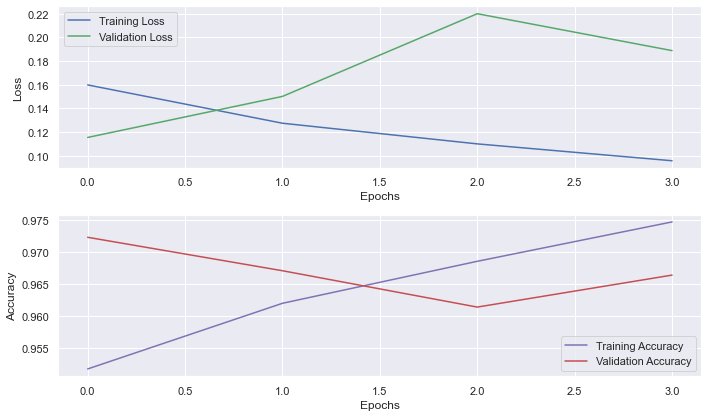

In [37]:
# Plotting Loss and Accuracy Graphs for optimizer: RMSprop
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(history.history['loss'], label='Training Loss', c='b')
ax[0].plot(history.history['val_loss'], label='Validation Loss',c='g', axes=ax[0])
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], label='Training Accuracy', c='m')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy',c='r', axes=ax[1])
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()


The choice of an optimizer can drammatically influence the performance of the model. Using an epoch=4 and no callbacks, all our optimizers did relatively well. Our main objective here is to select an optimizer that is fast, efficient and generalizes well. Let's evaluate our trained models at this point.

- __Optimizer: Adam__
Accuracy: 0.92, Validation Accuracy: 0.95, Time taken: 296.399 sec
- __Optimizer: SGD__
Accuracy: 0.96, Validation Accuracy: 0.95, Time taken: 310.495 sec
- __Optimizer: RMSprop__
Accuracy: 0.97, Validation Accuracy: 0.9664, Time taken: 309.671 sec

__Adam__ which stands for __*adaptive moment estimation*__ is an adaptive learning rate algorithm like RMSProp. It
requires less tuning of the learning rate hyperparameter η. The default value of η=0.001 works good. With epochs=4, the Adam optimizer was the fastest to converge with a good accuracy and validation accuracy score. 

__Stochastic Gradient Descent__ is slow to converge, hence we used momentum to help in faster convergence with a learning rate of 0.001. Surprisingly, it did well, but with increased momentum, the possibility of passing the optimal minimum increases. With increased epochs, in the long run this might result in poor accuracy. 

__RMSProp(Root Mean Square)__ keeps track of only the gradients from the most recent iterations and accelerates the optimization process. With epochs=4 it performs better than SGD and with increased epochs it will update and adjust to a better final result.

Out of the above three optimizers, I have selected __RMSProp__ as our optimizer to train our model with increased epoch and callbacks.

## 3.4 Train model with increased epochs and callbacks

### Epochs=30

### Train Model with Optimizer: RMSprop

In [41]:
# Set longer epochs
epochs=30

In [56]:
## 1. Compile using Optimizer: RMSProp with callbacks and epochs=30

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9)
# Compile Model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
# Timing the epochs
tic = time()
# Fitting our model
# history = model.fit(X_trainN, y_train, epochs=epochs,
#                     validation_data=(X_validN, y_valid),
#                    callbacks=[learning_rate_reduction])
history = model.fit_generator(datagen.flow(X_trainN, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_validN, y_valid),
                             verbose=1, steps_per_epoch=X_trainN.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction, tensorboard])
toc = time()
elasped = toc - tic
print("Elasped time is %f seconds" % elasped)

Epoch 1/30
271/271 [==============================] - 70s 254ms/step - loss: 0.0760 - accuracy: 0.9827 - val_loss: 0.1731 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 2/30
271/271 [==============================] - 86s 316ms/step - loss: 0.0667 - accuracy: 0.9859 - val_loss: 0.7003 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 3/30
271/271 [==============================] - 105s 388ms/step - loss: 0.0666 - accuracy: 0.9855 - val_loss: 0.1625 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 4/30
271/271 [==============================] - 123s 454ms/step - loss: 0.0635 - accuracy: 0.9859 - val_loss: 0.2467 - val_accuracy: 0.9712 - lr: 0.0010
Epoch 5/30
271/271 [==============================] - 121s 447ms/step - loss: 0.0661 - accuracy: 0.9852 - val_loss: 0.1867 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 6/30
271/271 [==============================] - 125s 459ms/step - loss: 0.0619 - accuracy: 0.9865 - val_loss: 0.3354 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 7/30
271/271 [============================

In [55]:
# start TensorBoard before training to monitor it in progress
%load_ext tensorboard
%tensorboard --logdir {logs_base_dir}
# Activates an interactive TensorBoard dashboard
# that needs to be refreshed from time to time.


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1596), started 0:06:57 ago. (Use '!kill 1596' to kill it.)

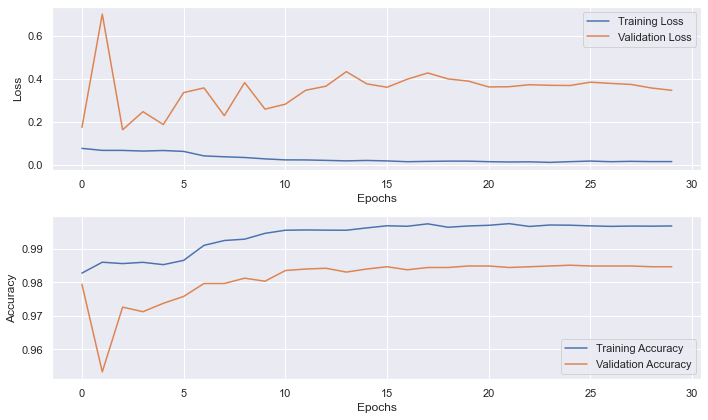

In [57]:
# Plotting Loss and Accuracy Graphs for RMSProp
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss', axes=ax[0])
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy', axes=ax[1])
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

From the interactive Tensorboard dashboard and the above learning curves we can see that both the training and validation accuracy became stable with barely any changes from the 20th epoch. 

### Evaluate Model on Test data

In [92]:
# Evaluating test performance & generating predictions on unseen data X_testN - RMSProp
print("Evaluate model on test data: ")
loss, acc = model.evaluate(X_testN, y_test)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

# Getting prediction on test set - RMSprop
y_pred = model.predict(X_testN)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

Evaluate model on test data: 
395/395 [==============================] - 10s 24ms/step - loss: 0.2434 - accuracy: 0.9787
loss: 0.24
acc: 0.98


An accuracy of 0.9787 on test result indicates that our trained CNN model did a good job.

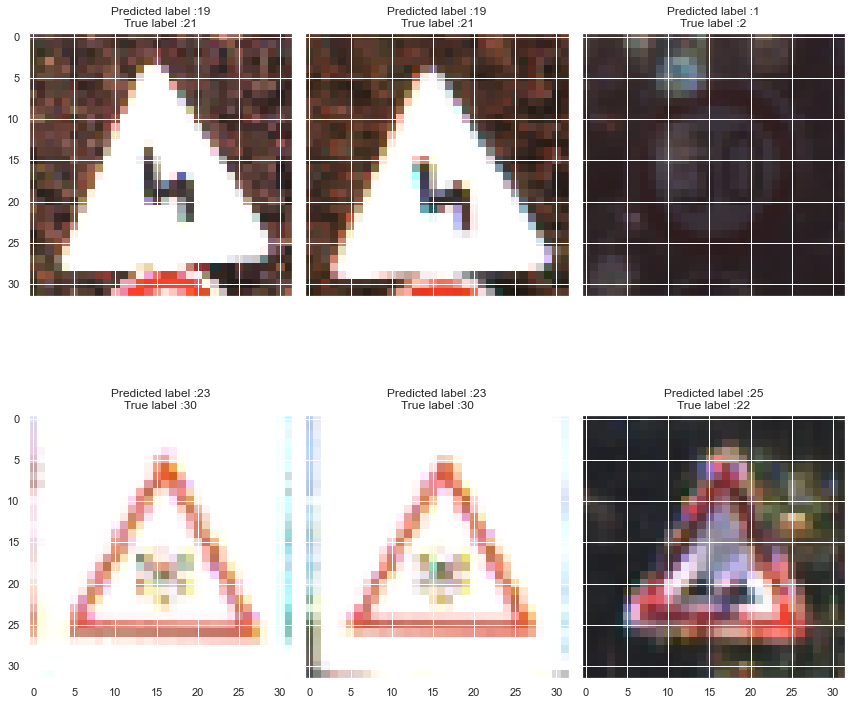

In [91]:
# Display some error results 
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_testN[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,figsize=(12,15),sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,-1)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            plt.tight_layout()
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 12 errors 
most_important_errors = sorted_delta_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, y_pred_classes_errors, y_true_errors)

Looking at some of the above error results, I'm not surprised that our trained CNN model was not able to predict them correctly. Owing to the poor image quality due to blurryness and uneven lighting condition, it may not be possible for even human beings to correctly identify these images.

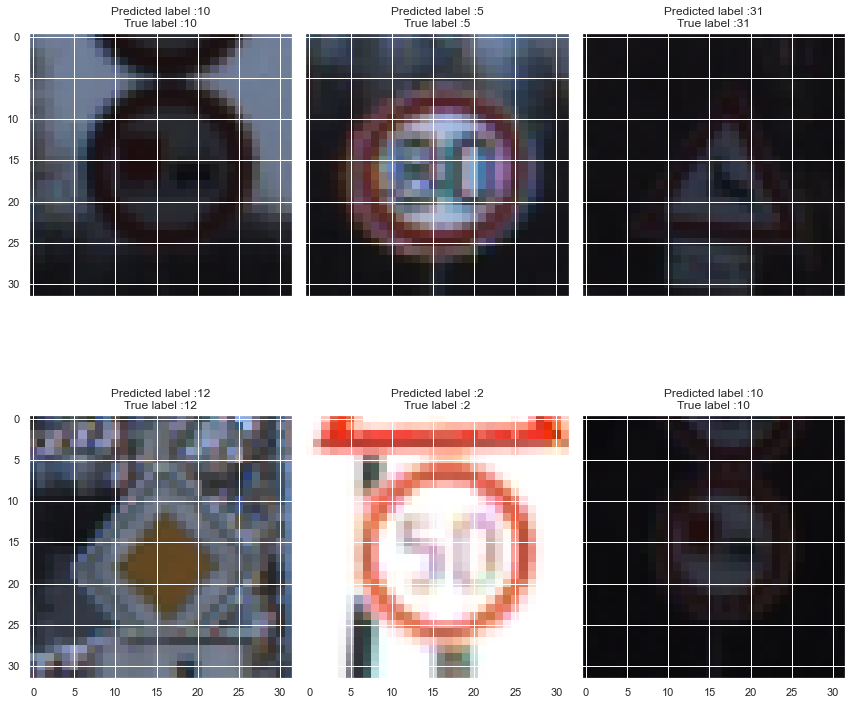

In [129]:
# Display some correct results 
correct = (y_pred_classes - y_true == 0)

y_pred_classes_correct = y_pred_classes[correct]
y_pred_correct = y_pred[correct]
y_true_correct = y_true[correct]
X_test_correct = X_testN[correct]

def display_correct(correct_index,img_correct,pred_correct, obs_correct):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,figsize=(12,15),sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            correct = correct_index[n]
            ax[row,col].imshow((img_correct[correct]).reshape((32,32,-1)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_correct[correct],obs_correct[correct]))
            plt.tight_layout()
            n += 1

# Probabilities of the correctly predicted numbers
y_pred_correct_prob = np.max(y_pred_correct,axis = 1)

# Predicted probabilities of the true values in the correct set
true_prob_correct = np.diagonal(np.take(y_pred_correct, y_true_correct, axis=1))

# Difference between the probability of the predicted label and the true labels
delta_pred_true_correct = y_pred_correct_prob - true_prob_correct

# Sorted list of the delta prob errors
sorted_delta_correct = np.argsort(delta_pred_true_correct)

# Top 6 correct predictions
most_important_correct = sorted_delta_correct[-6:]

# Show the top 6 correct prediction
display_correct(most_important_correct, X_test_correct, y_pred_classes_correct, y_true_correct)

Looking at the top 6 correctly predicted traffic sign images, my conclusion is, that our trained CNN model performed really well as again it may not be possible for even human beings to correctly identify them. The CNN model is really good at image processing, bringing out different distinct features from the images.